In [4]:
import numpy as np
import pandas as pd
import os

In [5]:
os.getcwd()

'c:\\Users\\Simardeep Bhatti\\Desktop\\jupyter'

In [6]:
data = pd.read_csv("spam.csv", encoding='latin1')


In [7]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data.shape

(5572, 5)

In [9]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

1. Data Cleaning

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [12]:
data.sample(5)

,v1,v2
2075,ham,Must come later.. I normally bathe him in da a...
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool
5342,spam,u r subscribed 2 TEXTCOMP 250 wkly comp. 1st w...
3294,ham,Dunno lei Ì_ all decide lor. How abt leona? Oo...
1351,ham,Yo theres no class tmrw right?


In [13]:
data=data.rename(columns={'v1': 'target' , 'v2':'text'})

In [14]:
data.sample(5)

,target,text
5355,ham,Living is very simple.. Loving is also simple....
122,spam,Todays Voda numbers ending 7548 are selected t...
3438,ham,"awesome, how do I deal with the gate? Charles ..."
2068,ham,Its hard to believe things like this. All can ...
1310,ham,"I.ll always be there, even if its just in spir..."


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
data['target'] = encoder.fit_transform(data['target'])

In [17]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
#missing values

data.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
#check for duplicate values

data.duplicated().sum()

403

In [20]:
#remove duplicates

data = data.drop_duplicates(keep='first')

In [21]:
data.duplicated().sum()

0

In [22]:
data.shape

(5169, 2)

2. EDA

In [23]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt

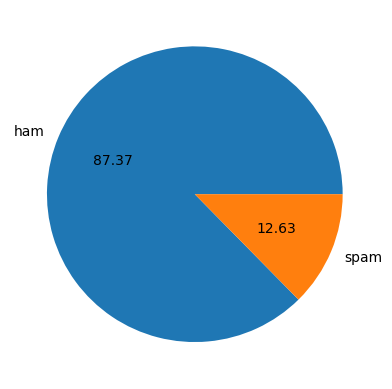

In [25]:
plt.pie(data['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [26]:
#data is imbalanced

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Simardeep
[nltk_data]     Bhatti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
data['num_of_characters'] = data['text'].apply(len)

In [30]:
data.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
#number of words in a sentence in text
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))     #nltk.word_tokenize(x)

In [32]:
data.head()

,target,text,num_of_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
#number of sentences

data['num_of_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
data.sample(5)

,target,text,num_of_characters,num_words,num_of_sentences
3631,0,Oooh I got plenty of those!,27,7,1
1601,0,Carlos is taking his sweet time as usual so le...,127,28,1
3143,0,"Haha I heard that, text me when you're around",45,11,1
3589,0,I am in escape theatre now. . Going to watch K...,69,16,3
2730,0,I havent lei.. Next mon can?,28,8,1


In [35]:
data[['num_of_characters', 'num_words', 'num_of_sentences']].describe()

,num_of_characters,num_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#ham

data[data['target']==0] [['num_of_characters', 'num_words', 'num_of_sentences']].describe()

,num_of_characters,num_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#spam

data[data['target']==1] [['num_of_characters', 'num_words', 'num_of_sentences']].describe()

,num_of_characters,num_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

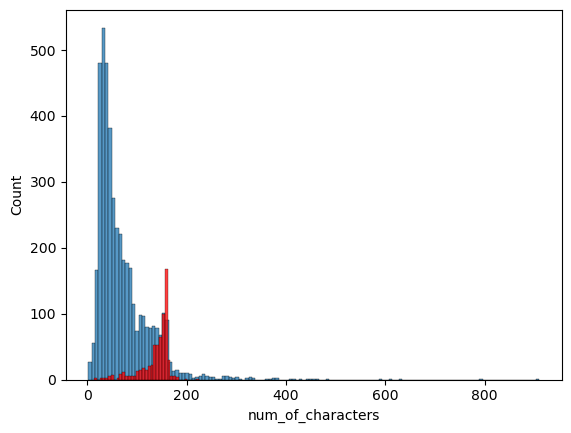

<Figure size 1200x800 with 0 Axes>

In [39]:
sns.histplot(data[data['target']==0] ['num_of_characters'])
sns.histplot(data[data['target']==1] ['num_of_characters'],color='red')
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

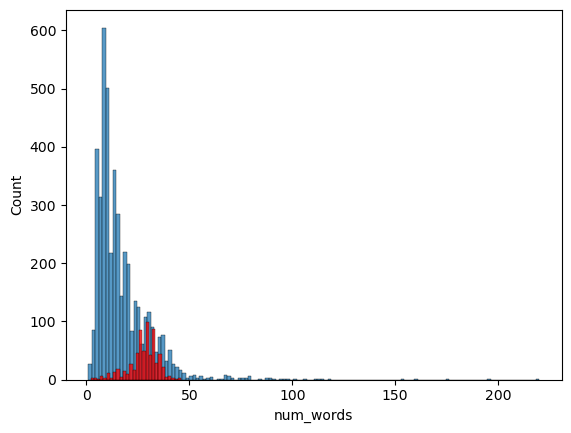

<Figure size 1200x800 with 0 Axes>

In [40]:
sns.histplot(data[data['target']==0] ['num_words'])
sns.histplot(data[data['target']==1] ['num_words'], color='red')
plt.figure(figsize=(12,8))

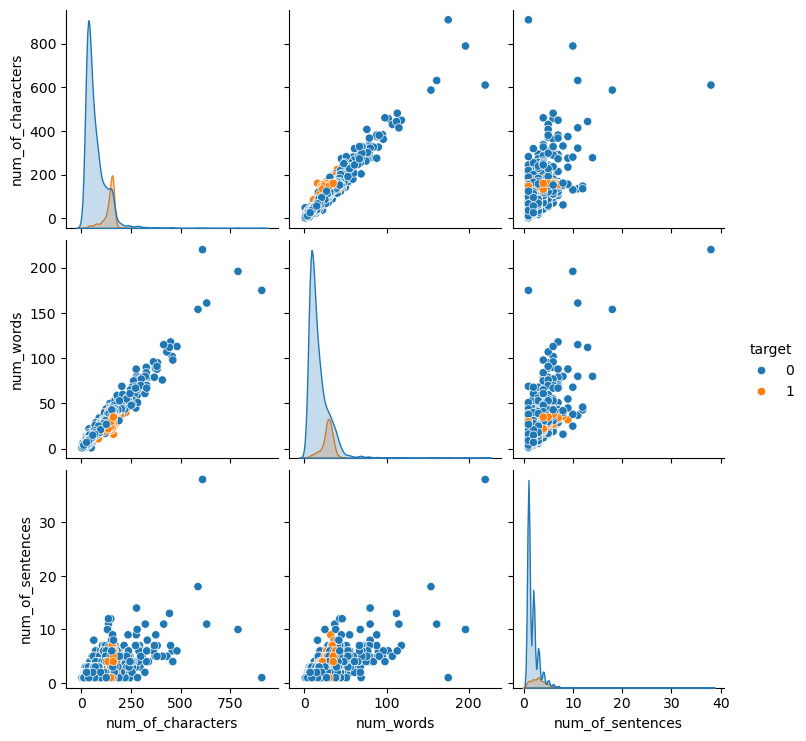

In [41]:
sns.pairplot(data, hue='target')

,target,num_of_characters,num_words,num_of_sentences
target,1.000000,0.384717,0.262912,0.263939
num_of_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_of_sentences,0.263939,0.624139,0.679971,1.000000


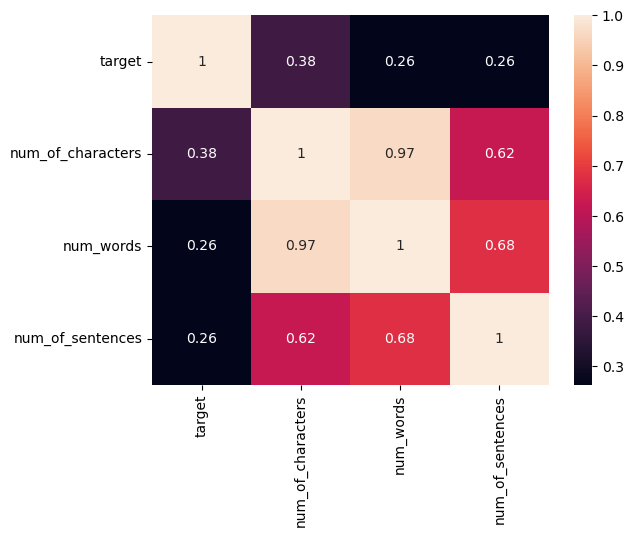

In [42]:
numeric_data=data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(),annot=True)
numeric_data.corr()

3. Data Preprocessing


Lower case


Tokenization


Removing special characters


Removing stop words and punctuation


Stemming

In [43]:
from nltk.corpus import stopwords
import string


In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Simardeep
[nltk_data]     Bhatti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [46]:
# example of stemmer
ps.stem('dancing')

'danc'

In [47]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
        
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [48]:
transform_text('Hi did you like the last lecture on ML ? I liked it very much !! $$%')

'hi like last lectur ml like much'

In [49]:
data['transformed_text'] = data['text'].apply(transform_text)

In [50]:
data.head()

,target,text,num_of_characters,num_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [52]:
spam_wc = wc.generate(data[data['target'] == 1] ['transformed_text'].str.cat(sep=" "))

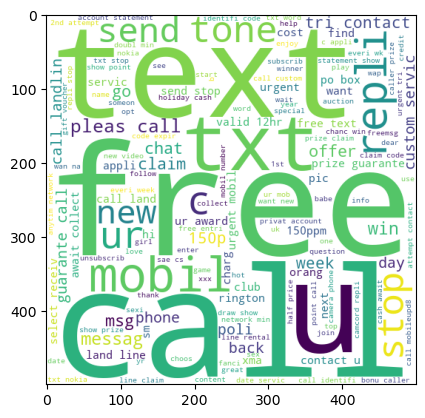

In [53]:
plt.imshow(spam_wc)

In [54]:
ham_wc = wc.generate(data[data['target'] == 0] ['transformed_text'].str.cat(sep=" "))

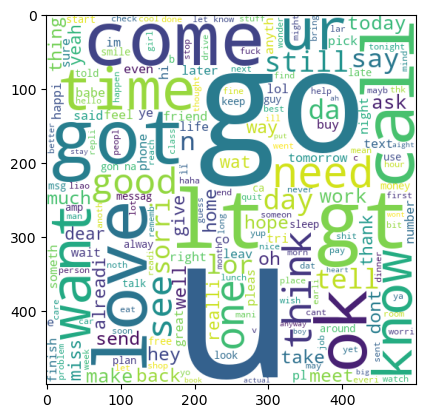

In [55]:
plt.imshow(ham_wc)

4. Model Building

In [56]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [57]:
x = tfidf.fit_transform(data['transformed_text']).toarray()

In [58]:
x.shape

(5169, 6708)

In [59]:
y=data['target'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 2)

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [63]:
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [64]:

GNB.fit(x_train, y_train)
y_pred1 = GNB.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [65]:
MNB.fit(x_train, y_train)
y_pred2 = MNB.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [66]:
BNB.fit(x_train, y_train)
y_pred3 = BNB.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [67]:
#therefore tfdif performs better than countvectorizer


In [68]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [69]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [73]:
# def train_classifier(clf,x_train,y_train,x_test,y_test):
#     clf.fit(x_train,y_train)
#     y_pred = clf.predict(x_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision

In [72]:
# train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [74]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


C:\Users\Simardeep Bhatti\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [75]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [76]:
# performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [79]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

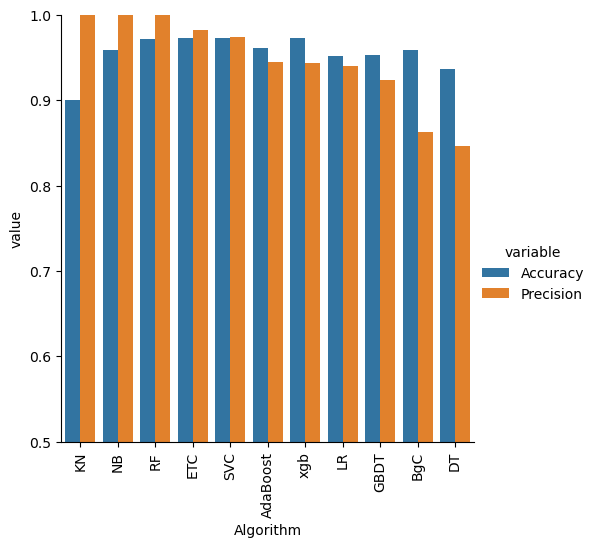

In [80]:
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [81]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))